In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


In [27]:
img_path = '/Users/aadipatangi/Desktop/Python Projects/ConeDetection/test/red/frame_1010.jpg'

In [31]:
def imgdisplay(img):
    plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB) )

In [28]:
image = cv.imread(img_path)


In [220]:
img2  = image
#img2[:,:,0]=0
#img2[:,:,1]=0


[[139 140 140 139 141 140 140 141 141 142]
 [139 140 140 139 141 140 139 140 141 141]
 [139 140 140 140 140 140 139 140 141 141]
 [139 140 140 140 140 140 140 141 141 141]
 [139 140 140 140 140 140 140 141 141 141]
 [139 139 140 141 139 139 140 141 141 141]
 [139 139 139 140 139 140 140 141 141 141]
 [139 138 139 140 140 140 141 142 142 141]
 [138 138 138 141 140 140 141 141 141 141]
 [138 138 138 140 140 140 141 141 141 141]]
[[172 174 173 170 166 167 169 168 166 167]
 [173 175 173 169 167 167 168 168 167 168]
 [173 173 171 169 166 166 167 167 167 169]
 [173 171 169 168 166 165 166 167 168 170]
 [169 169 168 168 163 166 169 171 172 172]
 [168 168 166 164 161 165 169 172 173 172]
 [166 165 163 159 158 163 170 174 174 172]
 [164 164 160 156 156 162 170 175 175 172]
 [163 163 160 156 156 161 169 174 174 171]
 [162 162 160 157 157 160 166 171 172 170]]


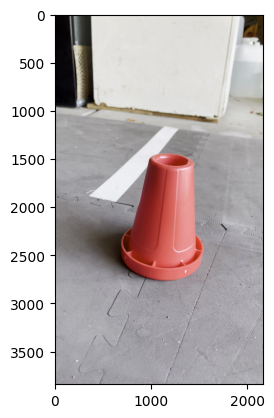

In [213]:
#img2[3500:3600,1000:1100,2] = 0
imgdisplay(img2)
print(img2[2000:2010,1300:1310,0])
print(img2[3500:3510,1300:1310,0])



In [214]:
#creating white image of equal dimensions
filteredimg = np.full(image.shape,255,dtype=int)


#adding pixel to white image if certain bgr thresholds are met
#(b>10) and (b < 75) and (r > 90) and (g < 100)
for x in range (0,image.shape[0]):
    for y in range (0,image.shape[1]):
        # bgr values
        b = image[x][y][0]
        g = image[x][y][1]
        r = image[x][y][2]

        # apply thresholds
        if (b < 100 ) and (r > 100) and (g < 100):
            filteredimg[x][y][0] = b
            filteredimg[x][y][1] = g
            filteredimg[x][y][2] = r
# end outer for loop
# 
       
# converting threshold image to grayscale        
newgray = cv.cvtColor(filteredimg.astype(np.uint8), cv.COLOR_BGR2GRAY)

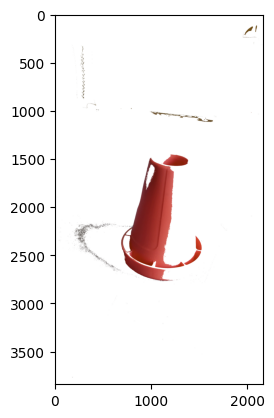

In [215]:
imgdisplay(filteredimg.astype(np.uint8))

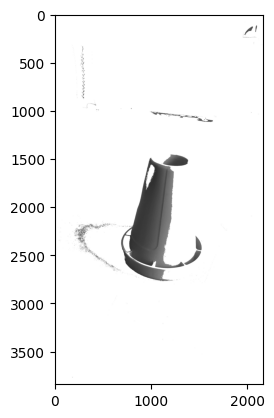

In [216]:
imgdisplay(newgray)


[[  9   9   9 ...  63  63  62]
 [  9   9   9 ...  62  62  61]
 [  9   9   9 ...  63  62  61]
 ...
 [157 157 157 ... 184 183 183]
 [156 156 156 ... 185 183 182]
 [156 156 156 ... 184 181 180]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


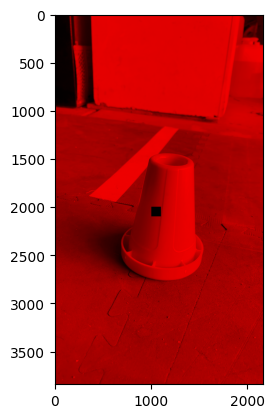

In [112]:
print(img2[:,:,2])
img2[2000:2100,1000:1100,2] = 0
print(img2[2000:2010,1000:1010,2])
imgdisplay(img2)

In [136]:
blue_img, green_img, red_img = cv.split(image)  # extracting red channel
rbin, threshImg = cv.threshold(red_img, 135, 255, cv.THRESH_BINARY)

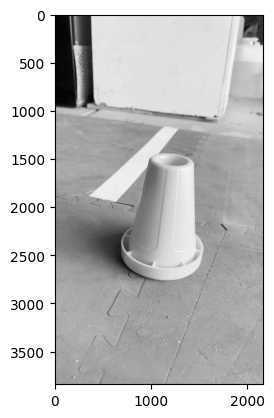

In [137]:
imgdisplay(red_img)


In [217]:
# Convert image to grayscale
#gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
 
# Convert image to binary
_, bw = cv.threshold(newgray, 120, 255, cv.THRESH_BINARY)
 
# Find all the contours in the thresholded image
contours, _ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
 
for i, c in enumerate(contours):
 
  # Calculate the area of each contour
  area = cv.contourArea(c)
 
  # Ignore contours that are too small or too large
  if area < 10000 :
    continue

  if area > 10000:
    print(area)
 
  # Draw each contour only for visualisation purposes
  cv.drawContours(img2, contours, i, (255, 0, 0), 6)
  
 

10128.5
382142.5
20497.5
10162.0
8288401.0


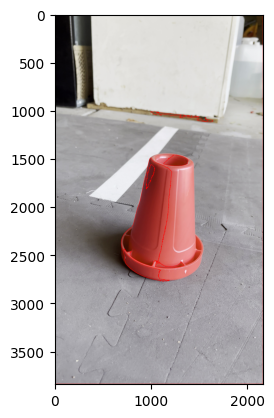

In [218]:

imgdisplay(img2)